# Customizing matplotlib plots using stylesheets

## Introduction: Matplotlib Stylesheets

One of my favorite libraries in Python is [matplotlib](http://matplotlib.org/). Despite the many options we Python programmers have, I still find the simplicity and rawness of `matplotlib` great to work with. 

A good amount of my workflow involves creating reproducible research in [jupyter-notebooks](http://jupyter.readthedocs.io/en/latest/content-quickstart.html). Notebooks are great for adhoc research as well as for creating publication quality pdf reports or web based dashboards. In fact, I have produced this particular webpage in a [notebook](./mplstyle-tutorial.ipynb).

While matplotlib comes with a lot of different stylesheets, I have run into scenarios where I wanted to create a style that resembled a particular color-scheme. This led me to explore [matplotlib stylesheets](http://matplotlib.org/users/style_sheets.html#defining-your-own-style). 

Throughout this post, I will demonstrate how to use `matplotlib` stylesheets to customize plots for your own needs.  

## Data Creation

First, let's create some random data using [Pandas](http://pandas.pydata.org/) and [NumPy](http://www.numpy.org/)

In [1]:
import pandas as pd
import numpy as np

In [2]:
rand_data = np.random.randn(1000 * 3).reshape(1000, 3)
returns = pd.DataFrame(rand_data, columns=list("ABC"), 
                       index=pd.date_range(start="2016-12-01 08:30:00", 
                                           freq="1s", periods=1000))

prices = returns.cumsum() + 100

In [3]:
prices[:10]

,A,B,C
2016-12-01 08:30:00,100.232142,99.682473,99.521759
2016-12-01 08:30:01,99.978837,99.446970,100.423348
2016-12-01 08:30:02,100.756137,100.772167,99.999918
2016-12-01 08:30:03,101.025152,99.063761,100.486253
2016-12-01 08:30:04,99.177024,99.689774,101.648877
2016-12-01 08:30:05,100.318996,99.723182,102.756434
2016-12-01 08:30:06,98.370779,101.317465,101.901374
2016-12-01 08:30:07,98.293057,102.366967,101.768990
2016-12-01 08:30:08,98.319536,102.300582,101.785594
2016-12-01 08:30:09,98.133255,102.308406,103.178428


## Basic matplotlib plotting

Let's plot this data as a time-series keeping out-of-the-box settings for [matplotlib](http://matplotlib.org/).

In [4]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

In [5]:
def plot_ts(df):
    fig, ax = plt.subplots()
    ax.plot_date(df.index.values, prices, '-')
    ax.set_ylabel("Price")
    ax.set_xlabel("Time")
    plt.suptitle("A Time Series Chart")
    plt.show()  

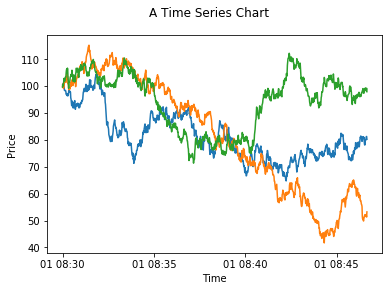

In [6]:
plot_ts(prices)

## Available stylesheets

`matplotlib` comes with a few stylesheet options. 

[seaborn](http://seaborn.pydata.org/) is another well-known plotting package for Python and is built as a wrapper on top of `matplotlib`. It installs its themes with the `matplotlib` themes. 

Let's look at the available options for stylesheets. 

In [7]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

## Using matplotlib stylesheets

We will use the `matplotlib` themes and see how they change the graph. 

### ggplot

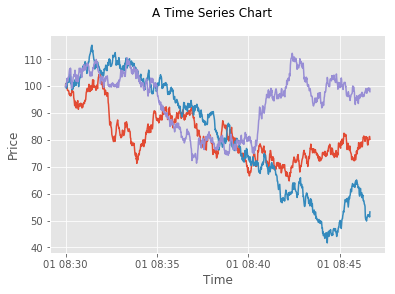

In [8]:
plt.style.use("ggplot")
plot_ts(prices)

### bmh

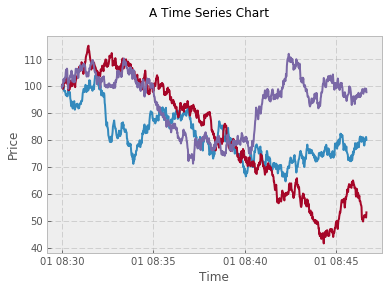

In [9]:
plt.style.use("bmh")
plot_ts(prices)

## Customization

If one of these options does not work for you, you are in the same boat as I was in one of my research projects. 

First thing I did was find a good palette of colors. One great resource to find or create a good pallete is [Paletton](http://paletton.com/). 

Here is a good article on [how and why to choose a good color palette](http://www.makeuseof.com/tag/pick-color-scheme-like-pro/).

![Palleton 1](./paletton1.png)

![Palleton 12](./paletton2.png)

Using the color-scheme, I have created a new mplstyle document, which you can download from [kapilsh.mplstyle](./kapilsh.mplstyle).

The document looks like this:

```javascript

patch.linewidth: 0.5
patch.facecolor: 348ABD
patch.edgecolor: EEEEEE
patch.antialiased: True

font.size: 10.0

axes.facecolor: D5D5D5
axes.edgecolor: black
axes.linewidth: 1
axes.grid: True
axes.titlesize: large
axes.labelsize: medium
axes.labelcolor: black
axes.axisbelow: True

axes.prop_cycle: cycler('color', ['5E4F6D', 'A18271', '4B6B61', 'A19E71', '623F2C', '312142','1D4136', '625F2C'])

xtick.color: black
xtick.direction: out

ytick.color: black
ytick.direction: out

grid.color: white
grid.linestyle: -

figure.facecolor: white
figure.edgecolor: 0.75
figure.figsize: 12, 10
figure.autolayout: False

```

For the property keys, you can reference your [matplotlibrc](http://matplotlib.org/users/customizing.html) file. It is typically imstalled in `~/.config/matplotlib/`.

## Sample plots

Let's use this stylesheet to create some sample graphs.

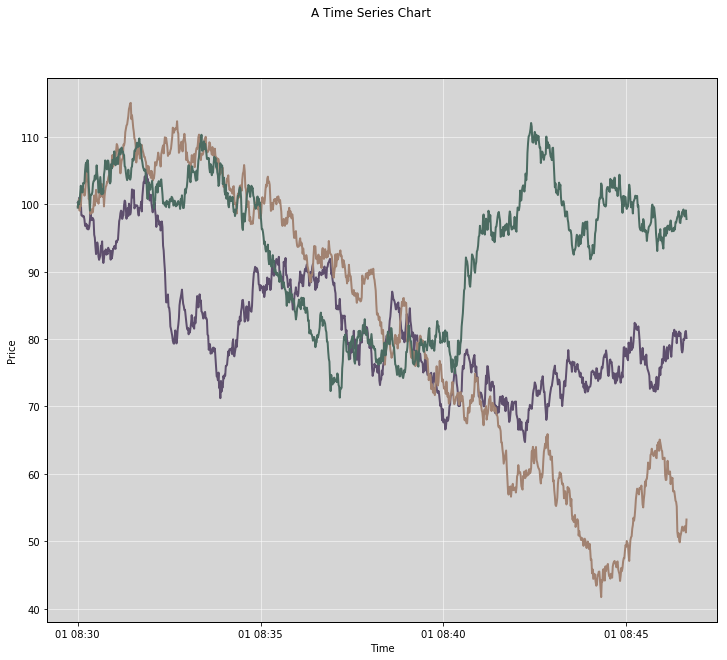

In [10]:
plt.style.use("kapilsh.mplstyle")
plot_ts(prices)

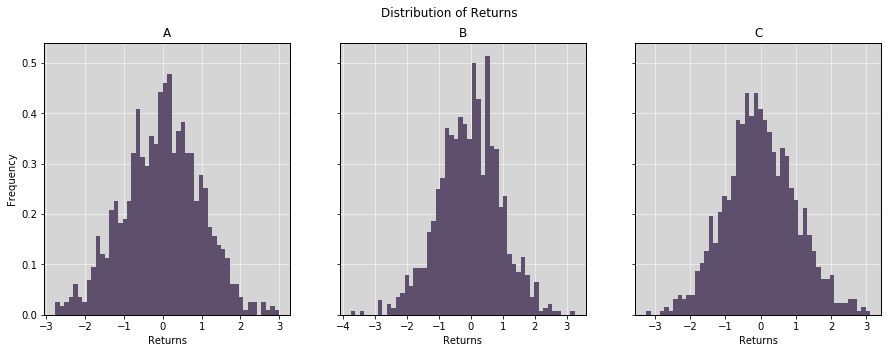

In [11]:
fig, ax_arr = plt.subplots(ncols=3, nrows=1, sharey=True)
ax = ax_arr[0]
n, bins, patches = ax.hist(returns["A"], 50, normed=1, histtype='stepfilled')
ax.set_ylabel("Frequency")
ax.set_xlabel("Returns")
ax.set_title("A")
ax = ax_arr[1]
n, bins, patches = ax.hist(returns["B"], 50, normed=1, histtype='stepfilled')
ax.set_xlabel("Returns")
ax.set_title("B")
ax = ax_arr[2]
n, bins, patches = ax.hist(returns["C"], 50, normed=1, histtype='stepfilled')
ax.set_xlabel("Returns")
ax.set_title("C")
plt.suptitle("Distribution of Returns")
plt.gcf().set_size_inches(15, 5)
plt.show()

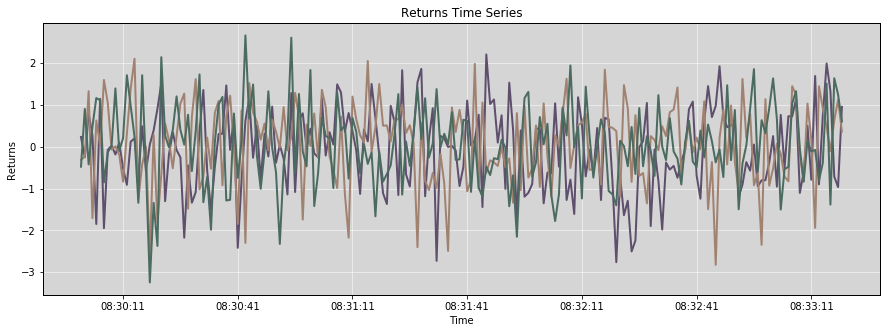

In [12]:
returns_sample = returns[:200]

fig, ax = plt.subplots()
ax.plot_date(returns_sample.index.values, returns_sample["A"], '-')
ax.plot_date(returns_sample.index.values, returns_sample["B"], '-')
ax.plot_date(returns_sample.index.values, returns_sample["C"], '-')
ax.set_ylabel("Returns")
ax.set_xlabel("Time")
ax.set_title("Returns Time Series")
plt.gcf().set_size_inches(15, 5)
plt.show()

## Summary

In this post, I have demonstrated how to use `matplotlib` stylesheets to customize `matplotlib` plots.

I used **Paletton** to create a color-scheme. 

Finally, I generated a new mplstyle stylesheet document and showed how to load it into your matplotlib environment to customize plots. 